<a href="https://colab.research.google.com/github/AgishevDm/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_2_(%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F)_%D0%90%D0%B3%D0%B8%D1%88%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание датасета

Набор данных heart_diseases.csv включает следующие признаки, связанные с наличием сердечных заболеваний:

*  age : Возраст пациента
*  gender : Пол пациента (1 = мужчина; 0 = женщина)
*  cp : Тип боли в груди (0 - типичная стенокардия, 1 - атипичная стенокардия, 2 - неангинальная боль, 3 - без боли)
*  trestbps : Артериальное давление в состоянии покоя
*  chol : Уровень холестерина в крови (мг/дл)
*  fbs : Уровень глюкозы натощак > 120 мг/дл (1 = да; 0 = нет)
*  restecg : Результаты электрокардиограммы в состоянии покоя
*  thalach : Максимальная частота сердечных сокращений
*  exang : Стенокардия, вызываемая физической нагрузкой (1 = да; 0 = нет)
*  oldpeak : Снижение сегмента ST при нагрузке по сравнению с отдыхом
*  slope : Наклон пикового сегмента ST во время нагрузки
*  ca : Количество крупных сосудов, окрашенных флюороскопией (от 0 до 3)
*  thal : Тип таламуса (3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект)
*  target : Наличие сердечных заболеваний (1 = да; 0 = нет)

***Подключене библиотек***

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set_palette('husl')
%matplotlib inline


***1. Загрузка данных***

In [2]:
heartd = pd.read_csv('heart_diseases.csv', delimiter=',')
heartd

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


***2. Определение данных для нормализации***

In [3]:
def utils_recognize_type(dtf, col, max_cat=20):
    '''
      Определяет, является ли столбец числовым или категориальным.
      :параметр
          :param dtf: dataframe - входные данные
          :param col:str - имя столбца для анализа
          :param max_cat: num — максимальное количество уникальных значений для распознавания столбца как категориального
      :возвращает
          "cat", если столбец является категориальным или "num" в противном случае
    '''

    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [4]:
'''
формируем словарь dic_cols.
Ключи - название фич
Значение - категориальный (cat) или числовой (num)
'''
dic_cols = {col:utils_recognize_type(heartd, col, max_cat=20) for col in heartd.columns}
dic_cols

{'age': 'num',
 'gender': 'cat',
 'cp': 'cat',
 'trestbps': 'num',
 'chol': 'num',
 'fbs': 'cat',
 'restecg': 'cat',
 'thalach': 'num',
 'exang': 'cat',
 'oldpeak': 'num',
 'slope': 'cat',
 'ca': 'cat',
 'thal': 'cat',
 'target': 'cat'}

In [5]:
'''
dtf.isnull() - возвращает датасет, который похож на изначальный датасет dtf, но в каждой ячейке вместо значений написано:
 False (если значение есть)
 True  (если в ячейке отсутствует значение)
'''
heatmap = heartd.isnull()
heatmap

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
'''
Проходим по столбцам, и меняем значения:
 если столбец числовой:
    пишем 0.5, если значение False (то есть оно не нулевое)
    пишем 1,   если значение True

 если столбец категориальный
    пишем 0, если значение False   (то есть оно не нулевое)
    пишем 1,   если значение True

После этого у нас окажется, что значения могут принимать всего три различных значения.
'''
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
heatmap

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
1,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
2,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
3,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
4,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
1021,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
1022,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0
1023,0.5,0,0,0.5,0.5,0,0,0.5,0,0.5,0,0,0,0


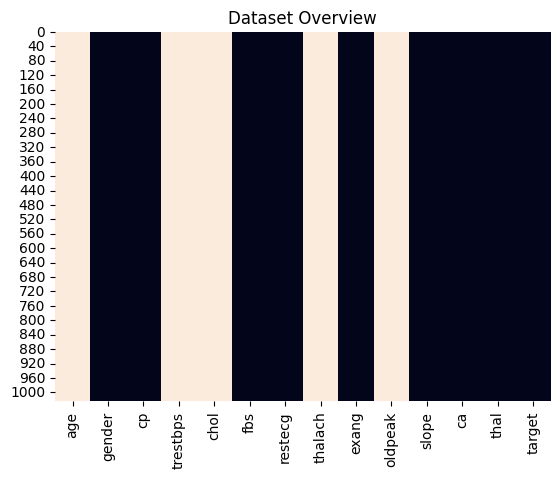

 Categerocial   Numeric   NaN 


In [7]:
'''
Строим heatmap (тепловую карту)
0.5 - если значение есть и оно числовое
0   - если значение есть и оно категориальное
1   - если значения в ячейке нет
'''
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

'''
Печатаем внизу подобие легенды, раскрашивая так, как нужно.
'''
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

Нормализовывать будем столбцы age, trestbps, chol, thalach, oldpeak

**3. Разделение набора данных**

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец class.

В X складываем весь набор данных без целевой переменной.

In [8]:
y = heartd['target']
X = heartd.drop(['target'], axis=1)

print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1025, 13) | y shape: (1025,) 


Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных, параметр stratify гарантирует, что пропорции классов в обучающей и тестовой выборках будут такими же, как в исходном наборе данных.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [10]:
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train), 2), "| y_test mean:", round(np.mean(y_test), 2))
print(X_train.shape[1], "features:", X.columns.to_list())

X_train shape: (820, 13) | X_test shape: (205, 13)
y_train mean: 0.51 | y_test mean: 0.51
13 features: ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


**4. Стандартизация**

In [11]:
# Стандартизация только для количественных данных
num_cols = [col for col in dic_cols if dic_cols[col] == "num"]
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Применяем стандартизацию только к количественным признакам
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [13]:
X_train_scaled

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
492,1.038277,1,2,-0.394753,1.215761,0,1,-0.753944,1,0.588278,1,0,3
339,0.599361,1,0,-0.109104,0.142068,0,1,-0.200429,1,0.251474,2,1,3
921,0.379903,1,0,0.804974,-0.528990,0,1,-1.860974,0,0.756680,1,1,3
949,0.270174,1,0,0.005156,-0.739894,0,1,0.821445,1,-0.927341,2,0,3
176,0.160445,1,0,-0.109104,0.717261,1,0,-1.946130,1,0.419876,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,1.257734,0,0,2.633129,-0.337259,1,1,0.693711,1,-0.085331,1,2,3
108,-1.595218,1,0,1.147753,-0.433125,0,1,1.374960,0,-0.927341,2,0,3
539,1.038277,1,3,2.176090,-0.356432,0,0,0.267930,0,-0.422135,1,0,3
660,0.709090,1,0,0.347935,-1.525991,0,0,-1.009412,1,2.103897,1,1,2


**5. Модели классификации**

In [14]:
# Создаем список моделей
models = [
    ('LR', LogisticRegression(solver='lbfgs', max_iter=1000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('NB', GaussianNB()),
    ('SVC', SVC(gamma='auto', probability=True))]


LR:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       399
           1       0.81      0.89      0.85       421

    accuracy                           0.83       820
   macro avg       0.84      0.83      0.83       820
weighted avg       0.84      0.83      0.83       820



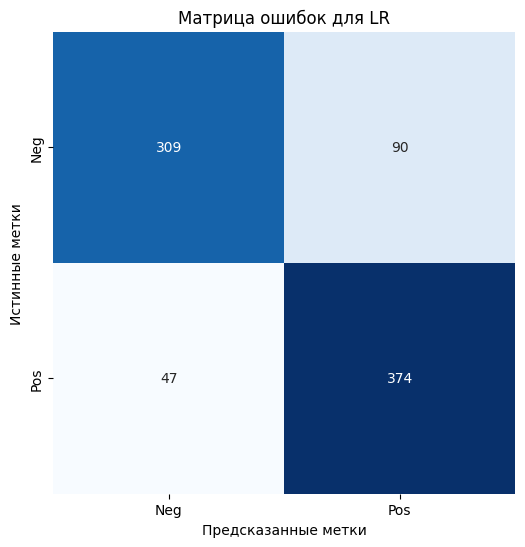

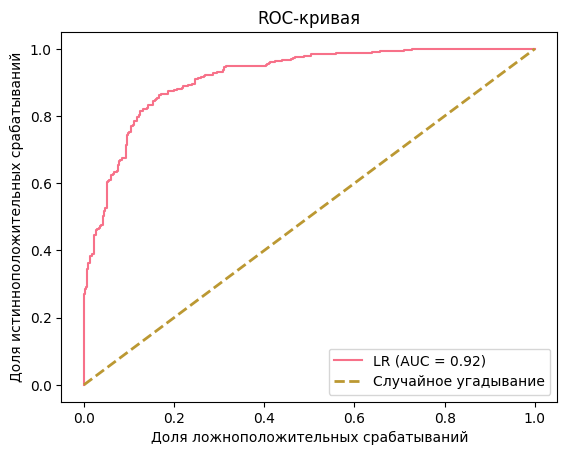


LDA:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       399
           1       0.79      0.90      0.84       421

    accuracy                           0.83       820
   macro avg       0.83      0.82      0.82       820
weighted avg       0.83      0.83      0.82       820



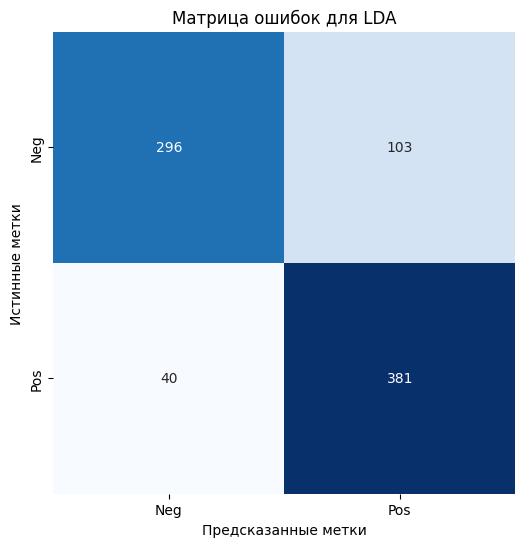

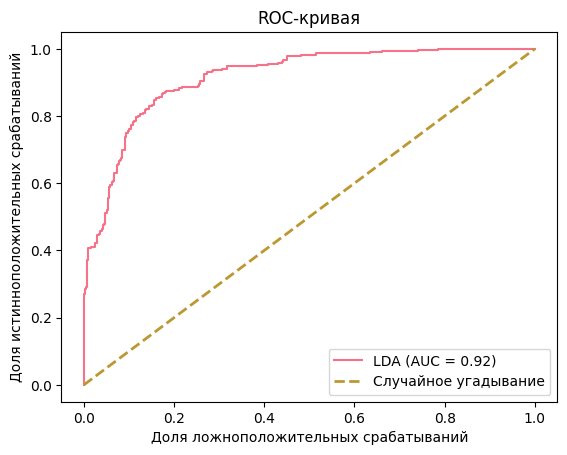


KNN:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       399
           1       0.83      0.81      0.82       421

    accuracy                           0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



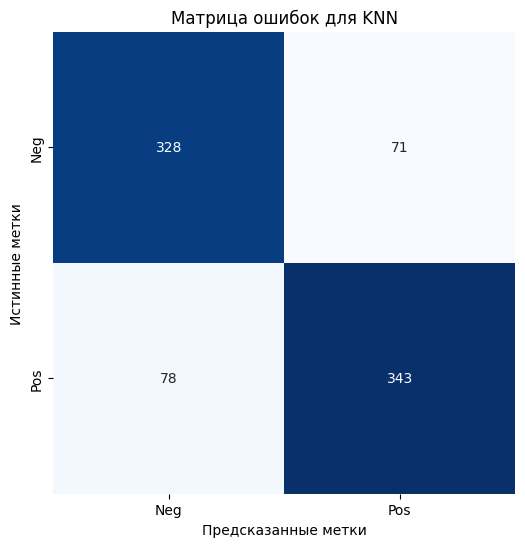

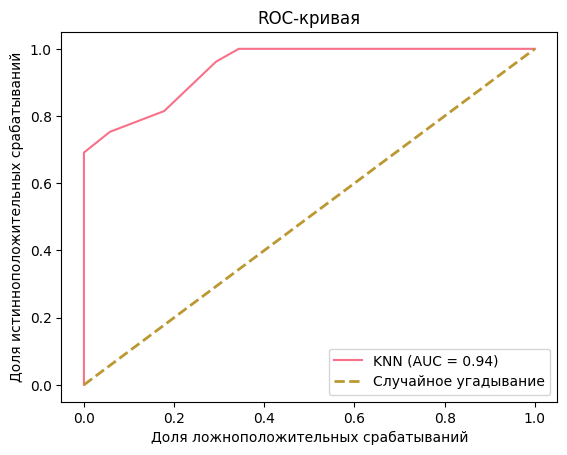


CART:
              precision    recall  f1-score   support

           0       0.92      0.83      0.88       399
           1       0.85      0.94      0.89       421

    accuracy                           0.89       820
   macro avg       0.89      0.88      0.88       820
weighted avg       0.89      0.89      0.88       820



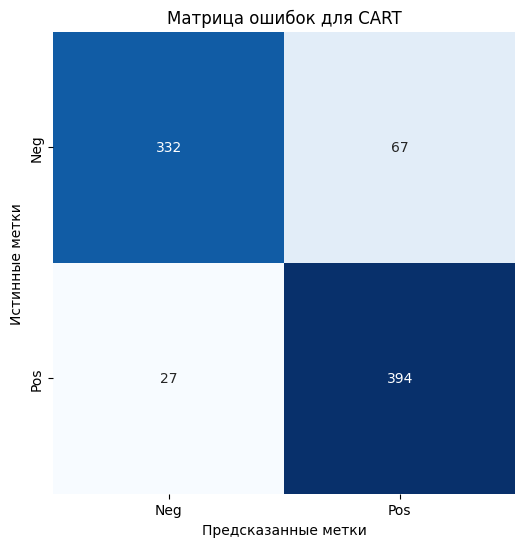

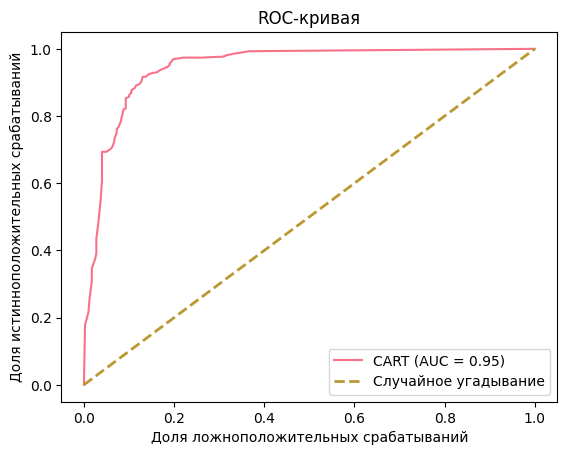


NB:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       399
           1       0.81      0.86      0.84       421

    accuracy                           0.83       820
   macro avg       0.83      0.82      0.82       820
weighted avg       0.83      0.83      0.83       820



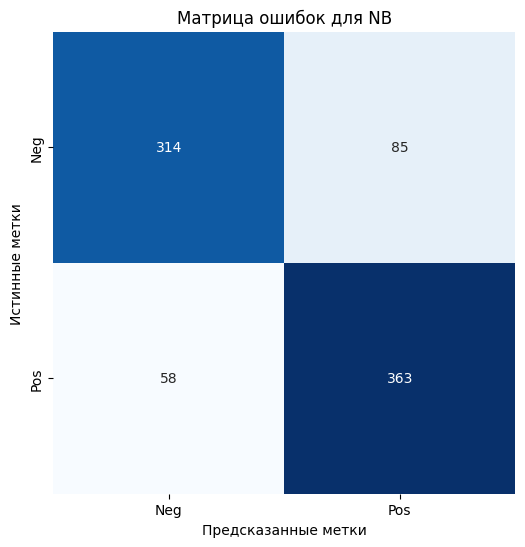

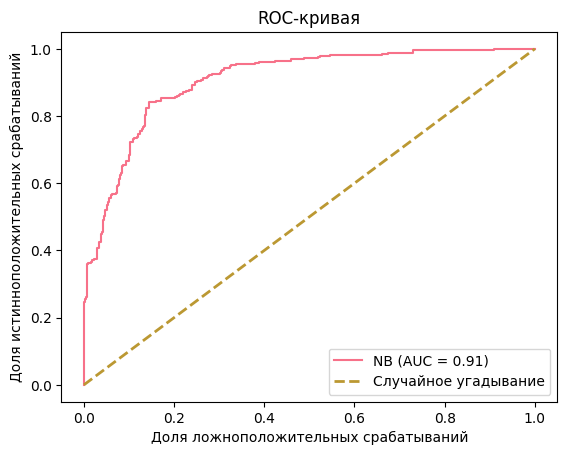


SVC:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       399
           1       0.85      0.91      0.88       421

    accuracy                           0.87       820
   macro avg       0.88      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



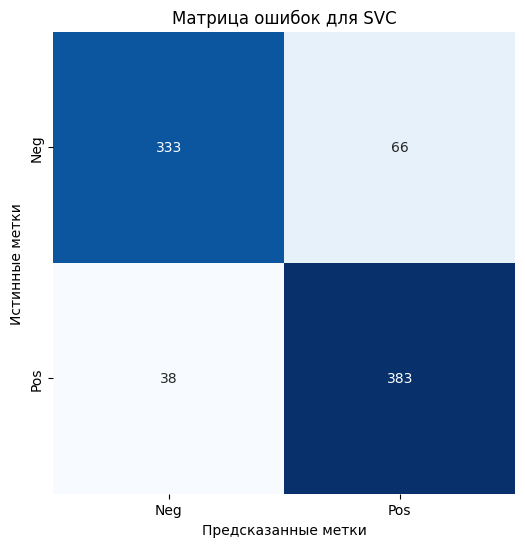

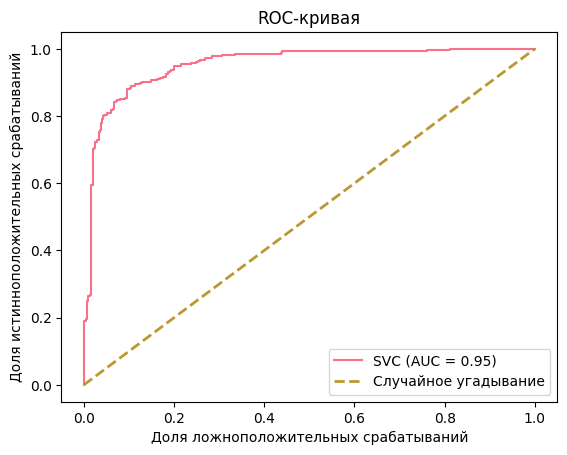

LR - Точность: 0.83293, Полнота: 0.88836, F1-мера: 0.84520
LDA - Точность: 0.82561, Полнота: 0.90499, F1-мера: 0.84199
KNN - Точность: 0.81829, Полнота: 0.81473, F1-мера: 0.82156
CART - Точность: 0.88537, Полнота: 0.93587, F1-мера: 0.89342
NB - Точность: 0.82561, Полнота: 0.86223, F1-мера: 0.83544
SVC - Точность: 0.87317, Полнота: 0.90974, F1-мера: 0.88046


In [15]:
# Словарь для хранения результатов и обученных моделей
results = {}
trained_models = {}

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    # Получаем предсказания с помощью кросс-валидации
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=kfold)
    probabilities = cross_val_predict(model, X_train_scaled, y_train, cv=kfold, method='predict_proba')[:, 1]

    # Рассчитываем метрики
    accuracy = accuracy_score(y_train, y_pred)
    report = classification_report(y_train, y_pred, output_dict=True)
    recall = report['1']['recall']  # Для класса "1"
    f1 = report['1']['f1-score']  # Для класса "1"

    # Сохраняем результаты
    results[name] = (accuracy, recall, f1)
    trained_models[name] = model.fit(X_train_scaled, y_train)  # Обучаем и сохраняем модель

    # Выводим отчет
    print(f"\n{name}:\n{classification_report(y_train, y_pred)}")

    # Строим матрицу ошибок
    cm = confusion_matrix(y_train, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
                xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.title(f'Матрица ошибок для {name}')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')
    plt.show()

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], '--', lw=2, label='Случайное угадывание')
    plt.xlabel('Доля ложноположительных срабатываний')
    plt.ylabel('Доля истинноположительных срабатываний')
    plt.title('ROC-кривая')
    plt.legend(loc='lower right')
    plt.show()

# Вывод результатов
for model_name, metrics in results.items():
    accuracy, recall, f1 = metrics
    print(f"{model_name} - Точность: {accuracy:.5f}, Полнота: {recall:.5f}, F1-мера: {f1:.5f}")

**6. Лучшая модель**

CART - Точность: 0.88537, Полнота: 0.93587, F1-мера: 0.89342

In [16]:
tree_model = trained_models['CART']
n_leaves = tree_model.get_n_leaves()
depth = tree_model.get_depth()

print(f"Количество листьев: {n_leaves}")
print(f"Глубина дерева: {depth}")

Количество листьев: 24
Глубина дерева: 5


[Text(0.4775641025641026, 0.9166666666666666, 'cp <= 0.5\ngini = 0.5\nsamples = 820\nvalue = [399, 421]'),
 Text(0.24358974358974358, 0.75, 'ca <= 0.5\ngini = 0.369\nsamples = 397\nvalue = [300, 97]'),
 Text(0.3605769230769231, 0.8333333333333333, 'True  '),
 Text(0.1282051282051282, 0.5833333333333334, 'thal <= 2.5\ngini = 0.498\nsamples = 176\nvalue = [93, 83]'),
 Text(0.05128205128205128, 0.4166666666666667, 'thalach <= -1.244\ngini = 0.399\nsamples = 98\nvalue = [27.0, 71.0]'),
 Text(0.02564102564102564, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.07692307692307693, 0.25, 'exang <= 0.5\ngini = 0.343\nsamples = 91\nvalue = [20, 71]'),
 Text(0.05128205128205128, 0.08333333333333333, 'gini = 0.101\nsamples = 56\nvalue = [3, 53]'),
 Text(0.10256410256410256, 0.08333333333333333, 'gini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.20512820512820512, 0.4166666666666667, 'oldpeak <= -0.38\ngini = 0.26\nsamples = 78\nvalue = [66, 12]'),
 Text(0.1794871794871795, 0.25, 'cho

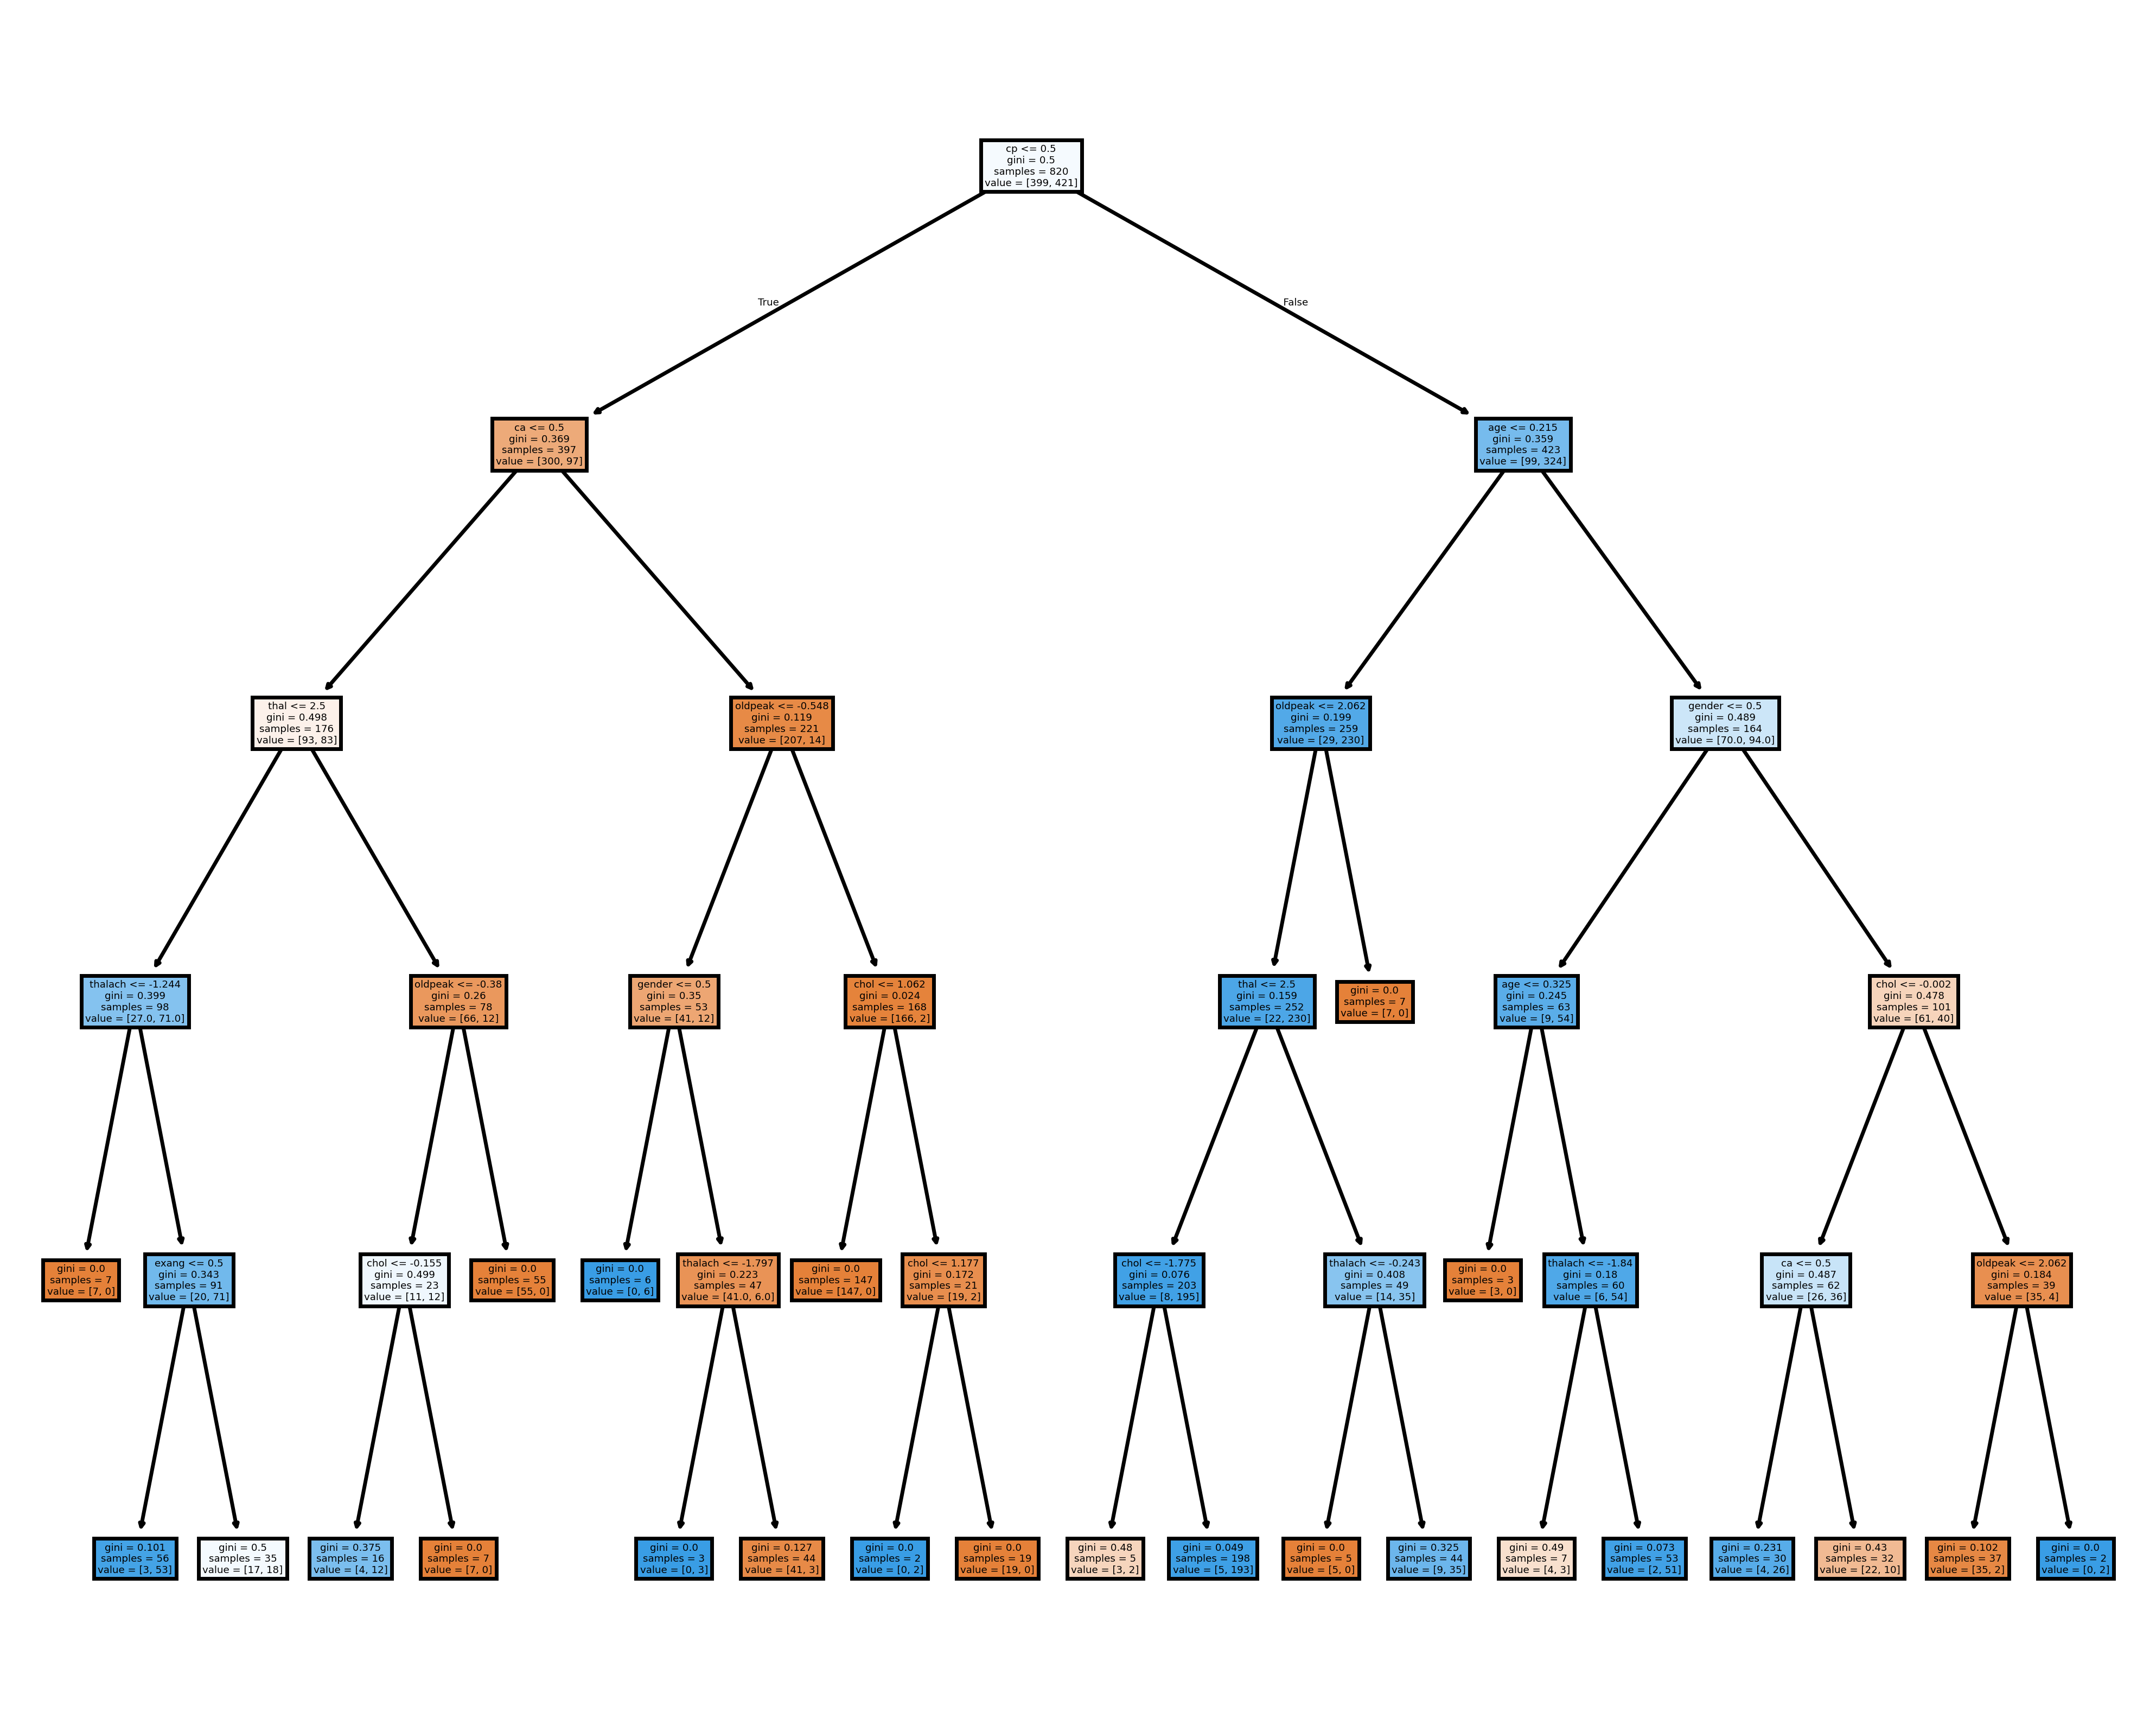

In [17]:
plt.figure(figsize=(10,8), dpi=500)
plot_tree(tree_model, feature_names=X.columns, filled=True)